In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,r2_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from drawdata import draw_scatter
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('bank_data.csv')
y=df.pop('y')

In [9]:
df.drop(['Unnamed: 0','day','month'],errors='ignore',axis=1,inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   duration   4521 non-null   int64 
 10  campaign   4521 non-null   int64 
 11  pdays      4521 non-null   int64 
 12  previous   4521 non-null   int64 
 13  poutcome   4521 non-null   object
dtypes: int64(6), object(8)
memory usage: 494.6+ KB
None


In [4]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,stratify=y)
print(x_train.shape)
print(y_train.shape)
cat_pipe=make_pipeline(OneHotEncoder(handle_unknown='ignore'))
cont_pipe=make_pipeline(StandardScaler())
prep=make_column_transformer((cat_pipe,make_column_selector(dtype_include='object')),
                            (cont_pipe,make_column_selector(dtype_include='number')))
pipe=Pipeline([('prep',prep),('estimator',RandomForestClassifier())])
params=[
    {'estimator': [RandomForestClassifier()],
    'estimator__class_weight': [{'yes':5,'no':1},'balanced']},
    {'estimator': [SVC(kernel='rbf')],
    'estimator__class_weight': [{'yes':5,'no':1},'balanced']},
    {'estimator': [KNeighborsClassifier(n_neighbors=10)]}
]

(3616, 14)
(3616,)


# Model evaluation using precision and recall

In [5]:
cls=GridSearchCV(pipe,params,cv=5,verbose=10,scoring=['precision_macro','recall_macro'],refit='precision_macro')
cls.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 1/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.768) recall_macro: (test=0.577) total time=   0.8s
[CV 2/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 2/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.719) recall_macro: (test=0.574) total time=   0.7s
[CV 3/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 3/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.733) recall_macro: (test=0.571) total time=   0.6s
[CV 4/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 4/5; 1/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000226E197AB10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._colum...
                                       ('estimator',
                                        RandomForestClassifier())]),
             param_grid=[{'estimator': [RandomForestClassifier()],
                          'estimator__class_weight': [{'no': 1, 'yes': 5},
                                                      'balanced']},
                         {'estimator': [SVC()],
                          'estimator__class_weight': [{'no': 1, 'yes': 5},
                                                      'balanced']},
                         {'estimator': [KNeighborsClassifier(n_neighbors=10)]}],
             refit='precision_macro',
             scoring=['precision_macro', 'recall_macro'], verbose=10)

In [32]:
print(confusion_matrix(y_test,cls.predict(x_test)))
print(cls.best_params_)

[[788  13]
 [ 81  23]]
{'estimator': KNeighborsClassifier(n_neighbors=10)}


In [6]:
cls=GridSearchCV(pipe,params,cv=5,verbose=10,scoring=['precision_macro','recall_macro'],refit='recall_macro')
cls.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 1/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.757) recall_macro: (test=0.609) total time=   0.8s
[CV 2/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 2/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.733) recall_macro: (test=0.596) total time=   0.8s
[CV 3/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 3/5; 1/5] END estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}; precision_macro: (test=0.751) recall_macro: (test=0.583) total time=   0.7s
[CV 4/5; 1/5] START estimator=RandomForestClassifier(), estimator__class_weight={'yes': 5, 'no': 1}
[CV 4/5; 1/5] E

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x00000226E197AB10>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._colum...
                                        RandomForestClassifier())]),
             param_grid=[{'estimator': [RandomForestClassifier()],
                          'estimator__class_weight': [{'no': 1, 'yes': 5},
                                                      'balanced']},
                         {'estimator': [SVC(class_weight='balanced')],
                          'estimator__class_weight': [{'no': 1, 'yes': 5},
                                                      'balanced']},
                         {'estimator': [KNeighborsClassifier(n_neighbors=10)]}],
             refit='recall_macro', scoring=['precision_macro', 'recall_macro'],
             verbose=10)

In [7]:
print(confusion_matrix(y_test,cls.predict(x_test)))
print(cls.best_params_)

[[676 125]
 [ 24  80]]
{'estimator': SVC(class_weight='balanced'), 'estimator__class_weight': 'balanced'}


In [38]:
# x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,stratify=y)
# print(x_train.shape)
# print(y_train.shape)
# cat_pipe=make_pipeline(OneHotEncoder(handle_unknown='ignore'))
# cont_pipe=make_pipeline(StandardScaler())
# prep=make_column_transformer((cat_pipe,make_column_selector(dtype_include='object')),
#                             (cont_pipe,make_column_selector(dtype_include='number')))
# pipe=Pipeline([('prep',prep),('estimator',SVC(kernel='rbf'))])
# params=[
#     {'estimator': [SVC(kernel='rbf')],
#     'estimator__class_weight': [{'yes':5,'no':1},{'yes':2,'no':1},{'yes':3,'no':2},{'yes':1,'no':2},'balanced'],
#     'estimator__C': [0.001,0.01,1,100,10000],
#     'estimator__gamma': ['scale',1,20,300,0.1,0.5]
#     }
# ]
# cls=GridSearchCV(pipe,params,cv=5,verbose=10,scoring=['precision_macro','recall_macro'],refit='recall_macro')
# cls.fit(x_train,y_train)

(3616, 14)
(3616,)
Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5; 1/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale
[CV 1/5; 1/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.9s
[CV 2/5; 1/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale
[CV 2/5; 1/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.9s
[CV 3/5; 1/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale
[CV 3/5; 1/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale; precisi

[CV 1/5; 6/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.9s
[CV 2/5; 6/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5
[CV 2/5; 6/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.9s
[CV 3/5; 6/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5
[CV 3/5; 6/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.9s
[CV 4/5; 6/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5
[CV 4/5; 6/150] END estim

[CV 2/5; 11/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.4s
[CV 3/5; 11/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 3/5; 11/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.4s
[CV 4/5; 11/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 4/5; 11/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.4s
[CV 5/5; 11/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 5/5; 11/150] EN

[CV 3/5; 16/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.4s
[CV 4/5; 16/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 4/5; 16/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.4s
[CV 5/5; 16/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 5/5; 16/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.4s
[CV 1/5; 17/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.1
[CV 1/5; 17/150] EN

[CV 4/5; 21/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.3s
[CV 5/5; 21/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20
[CV 5/5; 21/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.3s
[CV 1/5; 22/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300
[CV 1/5; 22/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.6s
[CV 2/5; 22/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300
[CV 2/5; 22/150] END e

[CV 5/5; 26/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=1; precision_macro: (test=0.058) recall_macro: (test=0.500) total time=   1.3s
[CV 1/5; 27/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=20
[CV 1/5; 27/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.3s
[CV 2/5; 27/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=20
[CV 2/5; 27/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=20; precision_macro: (test=0.057) recall_macro: (test=0.500) total time=   1.3s
[CV 3/5; 27/150] START estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, estimator__gamma=20
[CV 3/5; 27/150] END estimator=SVC(), estimator__C=0.001, estimator__class_weight=balanced, 

[CV 2/5; 32/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.0s
[CV 3/5; 32/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1
[CV 3/5; 32/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.0s
[CV 4/5; 32/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1
[CV 4/5; 32/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.1s
[CV 5/5; 32/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1
[CV 5/5; 32/150] END estimator=SVC(),

[CV 3/5; 37/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.4s
[CV 4/5; 37/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale
[CV 4/5; 37/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.5s
[CV 5/5; 37/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale
[CV 5/5; 37/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.5s
[CV 1/5; 38/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=1
[CV 1/5; 38/150] 

[CV 4/5; 42/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.6s
[CV 5/5; 42/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5
[CV 5/5; 42/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.7s
[CV 1/5; 43/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=scale
[CV 1/5; 43/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=scale; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.4s
[CV 2/5; 43/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=scale
[CV 2/5; 43/150] EN

[CV 5/5; 47/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.1; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.4s
[CV 1/5; 48/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.5
[CV 1/5; 48/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.5; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.6s
[CV 2/5; 48/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.5
[CV 2/5; 48/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.5; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.7s
[CV 3/5; 48/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.5
[CV 3/5; 48/150] END esti

[CV 1/5; 53/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   0.3s
[CV 2/5; 53/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1
[CV 2/5; 53/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.3s
[CV 3/5; 53/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1
[CV 3/5; 53/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   0.3s
[CV 4/5; 53/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.1
[CV 4/5; 53/150] END esti

[CV 3/5; 58/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.9s
[CV 4/5; 58/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=300
[CV 4/5; 58/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.9s
[CV 5/5; 58/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=300
[CV 5/5; 58/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.9s
[CV 1/5; 59/150] START estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, estimator__gamma=0.1
[CV 1/5; 59/150] END estimator=SVC(), estimator__C=0.01, estimator__class_weight=balanced, 

[CV 5/5; 63/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.7s
[CV 1/5; 64/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=300
[CV 1/5; 64/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.9s
[CV 2/5; 64/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=300
[CV 2/5; 64/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   2.1s
[CV 3/5; 64/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=300
[CV 3/5; 64/150] END estimator=SVC(), estima

[CV 1/5; 69/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.4s
[CV 2/5; 69/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20
[CV 2/5; 69/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.499) total time=   1.4s
[CV 3/5; 69/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20
[CV 3/5; 69/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.4s
[CV 4/5; 69/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=20
[CV 4/5; 69/150] END estimator=SVC(), estimator__

[CV 2/5; 74/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1; precision_macro: (test=0.601) recall_macro: (test=0.522) total time=   1.1s
[CV 3/5; 74/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1
[CV 3/5; 74/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1; precision_macro: (test=0.587) recall_macro: (test=0.516) total time=   1.1s
[CV 4/5; 74/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1
[CV 4/5; 74/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1; precision_macro: (test=0.578) recall_macro: (test=0.516) total time=   1.2s
[CV 5/5; 74/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=1
[CV 5/5; 74/150] END estimator=SVC(), estimator__C=1, e

[CV 3/5; 79/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=scale; precision_macro: (test=0.769) recall_macro: (test=0.550) total time=   0.4s
[CV 4/5; 79/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=scale
[CV 4/5; 79/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=scale; precision_macro: (test=0.782) recall_macro: (test=0.556) total time=   0.4s
[CV 5/5; 79/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=scale
[CV 5/5; 79/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=scale; precision_macro: (test=0.781) recall_macro: (test=0.556) total time=   0.4s
[CV 1/5; 80/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=1
[CV 1/5; 80/150] END estimator=SVC(

[CV 4/5; 84/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.5; precision_macro: (test=0.695) recall_macro: (test=0.521) total time=   0.7s
[CV 5/5; 84/150] START estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.5
[CV 5/5; 84/150] END estimator=SVC(), estimator__C=1, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=0.5; precision_macro: (test=0.891) recall_macro: (test=0.547) total time=   0.7s
[CV 1/5; 85/150] START estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=scale
[CV 1/5; 85/150] END estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=scale; precision_macro: (test=0.672) recall_macro: (test=0.803) total time=   0.6s
[CV 2/5; 85/150] START estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=scale
[CV 2/5; 85/150] END estimator=SVC(), estimator__C=1, estimator__class

[CV 2/5; 90/150] END estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5; precision_macro: (test=0.616) recall_macro: (test=0.601) total time=   0.9s
[CV 3/5; 90/150] START estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5
[CV 3/5; 90/150] END estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5; precision_macro: (test=0.665) recall_macro: (test=0.647) total time=   0.8s
[CV 4/5; 90/150] START estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5
[CV 4/5; 90/150] END estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5; precision_macro: (test=0.594) recall_macro: (test=0.589) total time=   0.8s
[CV 5/5; 90/150] START estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5
[CV 5/5; 90/150] END estimator=SVC(), estimator__C=1, estimator__class_weight=balanced, estimator__gamma=0.5;

[CV 3/5; 95/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.654) recall_macro: (test=0.707) total time=   0.6s
[CV 4/5; 95/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.1
[CV 4/5; 95/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.625) recall_macro: (test=0.646) total time=   0.6s
[CV 5/5; 95/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.1
[CV 5/5; 95/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.633) recall_macro: (test=0.644) total time=   0.7s
[CV 1/5; 96/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5
[CV 1/5; 96/150] END estimator=

[CV 4/5; 100/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   2.3s
[CV 5/5; 100/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=300
[CV 5/5; 100/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   2.2s
[CV 1/5; 101/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 1/5; 101/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.639) recall_macro: (test=0.633) total time=   0.8s
[CV 2/5; 101/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 2/5; 101/150] END est

[CV 5/5; 105/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.5s
[CV 1/5; 106/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 1/5; 106/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   2.1s
[CV 2/5; 106/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 2/5; 106/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   2.0s
[CV 3/5; 106/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 3/5; 106/150] END esti

[CV 1/5; 111/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.5s
[CV 2/5; 111/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20
[CV 2/5; 111/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.499) total time=   1.4s
[CV 3/5; 111/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20
[CV 3/5; 111/150] END estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   1.5s
[CV 4/5; 111/150] START estimator=SVC(), estimator__C=100, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20
[CV 4/5; 111/150] END estimator

[CV 2/5; 116/150] END estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1; precision_macro: (test=0.537) recall_macro: (test=0.513) total time=   1.1s
[CV 3/5; 116/150] START estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1
[CV 3/5; 116/150] END estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1; precision_macro: (test=0.587) recall_macro: (test=0.536) total time=   1.3s
[CV 4/5; 116/150] START estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1
[CV 4/5; 116/150] END estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1; precision_macro: (test=0.533) recall_macro: (test=0.512) total time=   1.1s
[CV 5/5; 116/150] START estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__gamma=1
[CV 5/5; 116/150] END estimator=SVC(), estimator__C=100, estimator__class_weight=balanced, estimator__g

[CV 4/5; 121/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.611) recall_macro: (test=0.628) total time=   1.6s
[CV 5/5; 121/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale
[CV 5/5; 121/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.635) recall_macro: (test=0.649) total time=   1.8s
[CV 1/5; 122/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1
[CV 1/5; 122/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1; precision_macro: (test=0.526) recall_macro: (test=0.508) total time=   1.1s
[CV 2/5; 122/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=1
[CV 2/5; 122/

[CV 4/5; 126/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.603) recall_macro: (test=0.564) total time=   0.7s
[CV 5/5; 126/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5
[CV 5/5; 126/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 5, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.634) recall_macro: (test=0.587) total time=   0.7s
[CV 1/5; 127/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale
[CV 1/5; 127/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale; precision_macro: (test=0.632) recall_macro: (test=0.630) total time=   1.5s
[CV 2/5; 127/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=scale
[CV 2/5

[CV 4/5; 131/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.624) recall_macro: (test=0.638) total time=   1.4s
[CV 5/5; 131/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1
[CV 5/5; 131/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.1; precision_macro: (test=0.632) recall_macro: (test=0.635) total time=   1.7s
[CV 1/5; 132/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5
[CV 1/5; 132/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5; precision_macro: (test=0.563) recall_macro: (test=0.537) total time=   0.7s
[CV 2/5; 132/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 2, 'no': 1}, estimator__gamma=0.5
[CV 2/5; 132/

[CV 4/5; 136/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.443) recall_macro: (test=0.500) total time=   2.0s
[CV 5/5; 136/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300
[CV 5/5; 136/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   2.1s
[CV 1/5; 137/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.1
[CV 1/5; 137/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.1; precision_macro: (test=0.643) recall_macro: (test=0.652) total time=   1.5s
[CV 2/5; 137/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 3, 'no': 2}, estimator__gamma=0.1
[CV 2/5; 137/

[CV 4/5; 141/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.497) total time=   1.4s
[CV 5/5; 141/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20
[CV 5/5; 141/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.7s
[CV 1/5; 142/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300
[CV 1/5; 142/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   2.4s
[CV 2/5; 142/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight={'yes': 1, 'no': 2}, estimator__gamma=300
[CV 2/5; 142/150

[CV 5/5; 146/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=1; precision_macro: (test=0.599) recall_macro: (test=0.534) total time=   1.4s
[CV 1/5; 147/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=20
[CV 1/5; 147/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=20; precision_macro: (test=0.442) recall_macro: (test=0.500) total time=   1.5s
[CV 2/5; 147/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=20
[CV 2/5; 147/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=20; precision_macro: (test=0.443) recall_macro: (test=0.499) total time=   1.5s
[CV 3/5; 147/150] START estimator=SVC(), estimator__C=10000, estimator__class_weight=balanced, estimator__gamma=20
[CV 3/5; 147/150] END estimator=SVC(), estimator__C=10000, estimator__class_weight=bal

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001CA66C3F590>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._colum...
                                       ('estimator', SVC())]),
             param_grid=[{'estimator': [SVC(C=1, class_weight='balanced')],
                          'estimator__C': [0.001, 0.01, 1, 100, 10000],
                          'estimator__class_weight': [{'no': 1, 'yes': 5},
                                                      {'no': 1, 'yes': 2},
                                                      {'no': 2, 'yes': 3},
                                                      {'no': 2, 'yes': 1},
                                                      'balanced'],
                          'estimator__gamma': ['scale', 1, 20, 300, 0.1, 0.5]}],
             refit='recall_macro', scoring=['precision_macro', 'recall_macro'],
             verbose=10)

In [17]:
print(confusion_matrix(y_test,cls.predict(x_test)))
print(cls.best_params_)

[[676 125]
 [ 24  80]]
{'estimator': SVC(class_weight='balanced'), 'estimator__class_weight': 'balanced'}


In [10]:
from sklearn.manifold import TSNE,MDS
x_embedded=TSNE(n_components=2).fit_transform(x_train.select_dtypes('number'))

In [20]:
x_embedded_2=MDS(n_components=2).fit_transform(x_train.select_dtypes('number'))

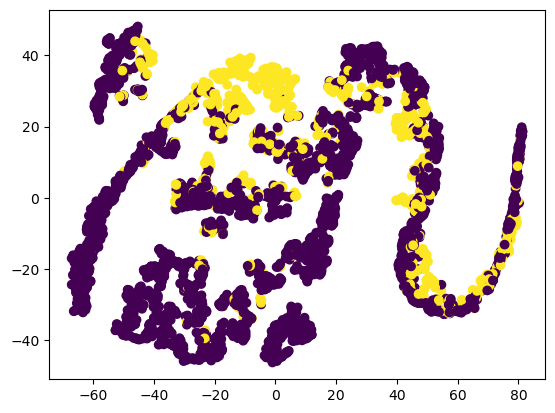

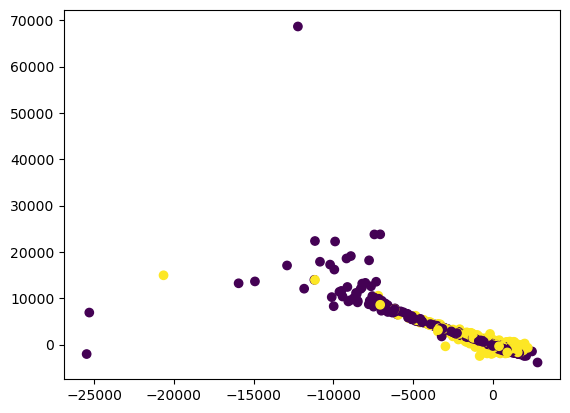

In [23]:
c=LabelEncoder().fit_transform(cls.predict(x_train))
plt.scatter(x_embedded[:,0],x_embedded[:,1],c=c)
plt.show()
plt.scatter(x_embedded_2[:,0],x_embedded_2[:,1],c=c)
plt.show()